In [151]:
import pandas as pd
from pprint import pprint as pp

In [152]:
crowdstorming_df = pd.read_csv('Data/CrowdstormingDataJuly1st.csv')
pp(crowdstorming_df.head())
pp(crowdstorming_df.columns.values)

     playerShort         player             club leagueCountry    birthday  \
0  lucas-wilchez  Lucas Wilchez    Real Zaragoza         Spain  31.08.1983   
1     john-utaka     John Utaka  Montpellier HSC        France  08.01.1982   
2    abdon-prats    Abdón Prats     RCD Mallorca         Spain  17.12.1992   
3     pablo-mari     Pablo Marí     RCD Mallorca         Spain  31.08.1993   
4     ruben-pena     Rubén Peña  Real Valladolid         Spain  18.07.1991   

   height  weight              position  games  victories    ...     rater2  \
0   177.0    72.0  Attacking Midfielder      1          0    ...       0.50   
1   179.0    82.0          Right Winger      1          0    ...       0.75   
2   181.0    79.0                   NaN      1          0    ...        NaN   
3   191.0    87.0           Center Back      1          1    ...        NaN   
4   172.0    70.0      Right Midfielder      1          1    ...        NaN   

   refNum  refCountry  Alpha_3   meanIAT    nIAT     seI

In [26]:
crowdstorming_df.shape

(146028, 28)

In [153]:
crowdstorming_df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [148]:
# Dropping Nan Values
crowdstorming_df = crowdstorming_df.dropna()
crowdstorming_df_num = crowdstorming_df
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Converting playerShort String to numerical representation
le.fit(list(set(crowdstorming_df['playerShort'])))
crowdstorming_df_num['playerShort'] = le.transform(crowdstorming_df['playerShort']) 

# Converting club String to numerical representation
le.fit(list(set(crowdstorming_df['club'])))
crowdstorming_df_num['club'] = le.transform(crowdstorming_df['club']) 


# Converting leagueCountry String to numerical representation
le.fit(list(set(crowdstorming_df['leagueCountry'])))
crowdstorming_df_num['leagueCountry'] = le.transform(crowdstorming_df['leagueCountry']) 

# Converting birthday String to numerical representation
le.fit(list(set(crowdstorming_df['birthday'])))
crowdstorming_df_num['birthday'] = le.transform(crowdstorming_df['birthday']) 


# Converting position String to numerical representation
le.fit(list(set(crowdstorming_df['position'])))
crowdstorming_df_num['position'] = le.transform(crowdstorming_df['position']) 


crowdstorming_df_num['club'].max()

91

In [30]:
f = {'club':'first',
     'leagueCountry':'first',
     'birthday':'first',
     'height':'first', 
     'weight':'first',
     'games': 'sum', 
     'victories':'sum',
     'ties': 'sum',
     'defeats': 'sum', 
     'goals': 'sum', 
     'yellowCards': 'sum', 
     'yellowReds': 'sum', 
     'redCards': 'sum',
     'position':'first',
     'refNum':'first',
     'refCountry':'first',
     'meanIAT':'mean',
     'nIAT':'mean', 
     'seIAT':'mean',
     'meanExp': 'mean',
     'nExp':'mean', 
     'seExp':'mean',
     'rater1':'mean',
     'rater2':'mean'
    }

crowdstorming_df_player_fixed = crowdstorming_df_num.groupby(['playerShort']).agg(f)
crowdstorming_df_player_referee = crowdstorming_df_player_fixed
#.mean().reset_index()
#crowdstorming_df_player_fixed[crowdstorming_df_player_fixed['playerShort']=='john-utaka']
crowdstorming_df_player_fixed = crowdstorming_df_player_fixed[['club','leagueCountry','birthday','height', 'weight','games', 
     'victories',
     'ties',
     'defeats', 
     'goals', 
     'yellowCards', 
     'yellowReds', 
     'redCards',
     'position',
     'meanIAT',
     'nIAT', 
     'seIAT',
     'meanExp',
     'nExp', 
     'seExp',
     'rater1',
     'rater2']]

crowdstorming_df_player_referee = crowdstorming_df_player_referee[[
     'club',
     'leagueCountry',
     'birthday',
     'height', 
     'weight',
    'games', 
     'victories',
     'ties',
     'defeats', 
     'goals', 
     'yellowCards', 
     'yellowReds', 
     'redCards',
     'position',
     'meanIAT',
     'nIAT', 
     'seIAT',
     'meanExp',
     'nExp', 
     'seExp',
     'rater1',
     'rater2'
     'refNum',
     'refCountry',
     'nIAT', 
     'seIAT',
     'meanExp',
     'nExp', 
     'seExp'
     ]]

In [36]:
#crowdstorming_df_player_fixed.apply(lambda x: pd.Series([x.playerShort.values[0]]))
len(crowdstorming_df_player_fixed)

1419

In [6]:
crowdstorming_df_player_fixed.columns.values

array(['club', 'leagueCountry', 'birthday', 'height', 'weight', 'games',
       'victories', 'ties', 'defeats', 'goals', 'yellowCards',
       'yellowReds', 'redCards', 'position', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'rater1', 'rater2'], dtype=object)

In [64]:
# Averaging over rater1 and rater2: 
crowdstorming_df_player_fixed['meanRating'] = (crowdstorming_df_player_fixed['rater1'] + crowdstorming_df_player_fixed['rater2'])/2
# Create Categories for Binary Classification
def binaryColor(x):
    if x < 0.5: 
        return 0
    else: 
        return 1
crowdstorming_df_player_fixed['BinaryColorClass'] = crowdstorming_df_player_fixed['meanRating'].apply(binaryColor) 

# Create Categories for Multi Classification
def multiColor(x):
    if x < 0.25: 
        return 0
    elif 0.25 <= x <0.5: 
        return 1
    elif 0.5 <= x < 0.75:
        return 2
    elif 0.75 <= x < 1:
        return 3
crowdstorming_df_player_fixed['MultiColorClass'] = crowdstorming_df_player_fixed['meanRating'].apply(multiColor) 
crowdstorming_df_player_fixed['MultiColorClass']

playerShort
0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
5       3.0
6       3.0
7       3.0
8       NaN
9       3.0
10      NaN
11      1.0
12      3.0
13      1.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      1.0
20      0.0
21      1.0
22      0.0
23      1.0
24      1.0
25      0.0
26      1.0
27      1.0
28      0.0
29      1.0
       ... 
1389    0.0
1390    1.0
1391    1.0
1392    2.0
1393    2.0
1394    3.0
1395    0.0
1396    2.0
1397    NaN
1398    2.0
1399    0.0
1400    0.0
1401    2.0
1402    1.0
1403    1.0
1404    2.0
1405    2.0
1406    0.0
1407    0.0
1408    0.0
1409    1.0
1410    1.0
1411    0.0
1412    1.0
1413    0.0
1414    1.0
1415    0.0
1416    3.0
1417    0.0
1418    0.0
Name: MultiColorClass, dtype: float64

In [65]:
X = crowdstorming_df_player_fixed [['weight', 'nExp', 'height', 'meanExp', 'yellowReds',
       'leagueCountry', 'club', 'seIAT', 'seExp', 'yellowCards',
       'nIAT', 'birthday', 'goals', 'ties', 'defeats', 'meanIAT',
       'victories', 'games', 'position', 'redCards']]
y_binary = crowdstorming_df_player_fixed ['BinaryColorClass']
y_multi = crowdstorming_df_player_fixed ['MultiColorClass']
train_dataset = X [1:1000]
test_dataset = X[1001:1419]

train_labels_binary = y_binary [1:1000]
test_targets_binary = y_binary [1001:1419]

train_labels_multi = y_multi [1:1000]
test_targets_multi = y_multi [1001:1419]

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X,y_binary, test_size=0.33)

In [138]:
X_train, X_test, y_train_binary, y_test_binary = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train_binary.reset_index(drop=True), y_test_binary.reset_index(drop=True)

In [139]:
weight_class = y_train_binary.value_counts()/len(y_train_binary)
weight_class

0    0.816054
1    0.183946
Name: BinaryColorClass, dtype: float64

In [140]:
sample_weights = []
for i in y_train_binary:
    sample_weights += [weight_class[i]]

## Binary Classification

In [141]:
# Fit a random forest to the training data for binary classification, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 10, random_state=1 , class_weight='balanced')

forest_binary = forest.fit(X_train, y_train_binary, sample_weight= sample_weights)

### Model Evaluation

In [142]:
from sklearn import metrics
result_binary_train = forest_binary.predict(X_train)
print(metrics.accuracy_score(y_train_binary, result_binary_train))

0.978818283166


In [143]:
from sklearn import metrics
# Test & extract results 
result_binary_test = forest_binary.predict(X_test)
print(metrics.accuracy_score(y_test_binary, result_binary_test))

0.805429864253


In [146]:
def balanced_error_rate (y_train,y_pred):
    N = len(y_train) 
    pos_train = 0
    neg_train = 0
    for i in range(1,N):
        if y_train[i] == 0: 
            neg_train = neg_train + 1
    
    pos_train = N - neg_train
    pos_pred = 0
    neg_pred = 0
    for j in range(1,N):
        if y_pred[i]==1:
            neg_pred = neg_pred + 1
        else:
            pos_pred = pos_pred + 1
    error = (1/2) * ((pos_train/pos_pred) + (neg_train/neg_pred))

In [147]:
balanced_error_rate(y_test_binary, result_binary_test)

ZeroDivisionError: integer division or modulo by zero

### K-Fold Cross Validation

In [54]:
from sklearn.cross_validation import cross_val_score
scores_binary = cross_val_score(forest_binary,  X, y_binary, cv=10, scoring='accuracy')
scores_binary.mean()

0.80882616990236789

### Feature Importance

Feature ranking:
1. feature 3 (0.096218)
2. feature 15 (0.076218)
3. feature 8 (0.066209)
4. feature 11 (0.059308)
5. feature 16 (0.058348)
6. feature 18 (0.056445)
7. feature 7 (0.055560)
8. feature 12 (0.054247)
9. feature 1 (0.051928)
10. feature 13 (0.050811)
11. feature 0 (0.050557)
12. feature 6 (0.045122)
13. feature 9 (0.044933)
14. feature 17 (0.042158)
15. feature 10 (0.041162)
16. feature 2 (0.038103)
17. feature 5 (0.037194)
18. feature 14 (0.036272)
19. feature 19 (0.021246)
20. feature 4 (0.017960)


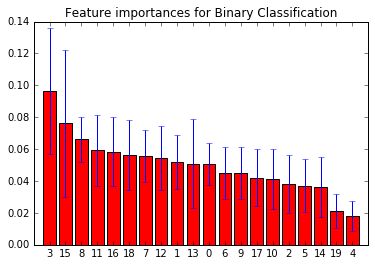

In [47]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

importances_binary = forest_binary.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances_binary)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances_binary[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Binary Classification")
plt.bar(range(X.shape[1]), importances_binary[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

/home/meryem/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


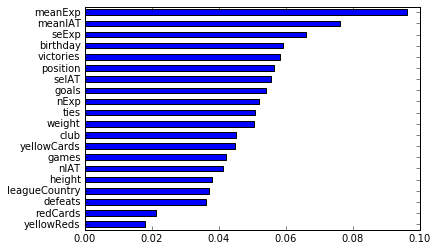

In [48]:
feature_importance= pd.Series(forest_binary.feature_importances_,index=X.columns)
feature_importance.sort()
feature_importance.plot(kind='barh')

# Multi-Class Classification

In [49]:
# Fit a random forest to the training data for multi-class classification, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 100 )

forest_multi = forest.fit(train_dataset, train_labels_multi)

# Test & extract results 
result_multi = forest_multi.predict(test_dataset)

### Model Evaluation

In [55]:
from sklearn import metrics
print(metrics.accuracy_score(test_targets_multi, result_multi))

0.505917159763


### K-Fold Cross Validation

In [56]:
from sklearn.cross_validation import cross_val_score
scores_binary = cross_val_score(forest_multi,  X, y_multi, cv=10, scoring='accuracy')
scores_binary.mean()

0.50818396569193669

### Feature Importance

Feature ranking:
1. feature 15 (0.068506)
2. feature 3 (0.067041)
3. feature 7 (0.061119)
4. feature 11 (0.059313)
5. feature 6 (0.059183)
6. feature 8 (0.058296)
7. feature 10 (0.056445)
8. feature 1 (0.055632)
9. feature 9 (0.055451)
10. feature 14 (0.055232)
11. feature 2 (0.053917)
12. feature 13 (0.052213)
13. feature 17 (0.049600)
14. feature 0 (0.049022)
15. feature 12 (0.048809)
16. feature 16 (0.046312)
17. feature 18 (0.036660)
18. feature 19 (0.025479)
19. feature 5 (0.021994)
20. feature 4 (0.019776)


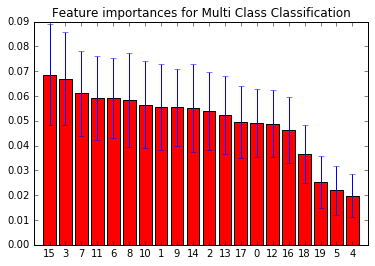

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

importances_multi = forest_multi.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances_multi)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances_multi[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Multi Class Classification")
plt.bar(range(X.shape[1]), importances_multi[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


### Learning Curves

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [ ]:
X_1 = crowdstorming_df_player_fixed [['weight', 'nExp', 'height', 'meanExp', 'yellowReds',
       'leagueCountry', 'club', 'seIAT', 'seExp', 'yellowCards',
       'nIAT']]
X_2 =  crowdstorming_df_player_fixed [[ 'birthday', 'goals', 'ties', 'defeats', 'meanIAT',
       'victories', 'games', 'position', 'redCards', 'playerShort',
       'meanRating']]
#from sklearn.model_selection import learning_curve
title = "Learning Curves Random Forest Multi-Class"
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
plot_learning_curve(forest_multi,title, train_dataset,train_labels_multi, (0.7, 1.01), cv=20, n_jobs=4)

# Exercise 2 

In [31]:
crowdstorming_df_player_referee.head()

,refNum,refCountry,nIAT,seIAT,meanExp,nExp,seExp
playerShort,,,,,,,
0,1701.0,44.0,19710.156627,0.000652,0.494575,20637.277108,0.004065
1,1784.0,8.0,26104.292929,0.000219,0.449220,26864.454545,0.000993
2,1730.0,44.0,21234.861386,0.000367,0.491482,22238.742574,0.002032
3,1804.0,44.0,38285.826923,0.003334,0.514693,39719.980769,0.013522
4,1756.0,7.0,2832.351351,0.001488,0.335587,2953.837838,0.005296


In [40]:
from sklearn.cluster import KMeans
import numpy as np
X = crowdstorming_df_player_referee
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

In [41]:
len(labels)

1419

In [42]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)

0.89580445395834851

### Remove features iteratively, and at each step perform again the clustering and compute the silhouette score

In [49]:
features = X.columns.values
len(features)
pp(features)
pp(features[0:0])

array(['refNum', 'refCountry', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'], dtype=object)
array([], dtype=object)


In [ ]:
import itertools
def findsubsets(S,m):
    return set(itertools.combinations(S, m))

In [53]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def subsets(s):
    return map(set, powerset(s))

In [59]:
if subsets(set([1,2,3]))[0] == set():
    print "true"
subsets(set(features))

true


[set(),
 {'nIAT'},
 {'refCountry'},
 {'nExp'},
 {'refNum'},
 {'seIAT'},
 {'seExp'},
 {'meanExp'},
 {'nIAT', 'refCountry'},
 {'nExp', 'nIAT'},
 {'nIAT', 'refNum'},
 {'nIAT', 'seIAT'},
 {'nIAT', 'seExp'},
 {'meanExp', 'nIAT'},
 {'nExp', 'refCountry'},
 {'refCountry', 'refNum'},
 {'refCountry', 'seIAT'},
 {'refCountry', 'seExp'},
 {'meanExp', 'refCountry'},
 {'nExp', 'refNum'},
 {'nExp', 'seIAT'},
 {'nExp', 'seExp'},
 {'meanExp', 'nExp'},
 {'refNum', 'seIAT'},
 {'refNum', 'seExp'},
 {'meanExp', 'refNum'},
 {'seExp', 'seIAT'},
 {'meanExp', 'seIAT'},
 {'meanExp', 'seExp'},
 {'nExp', 'nIAT', 'refCountry'},
 {'nIAT', 'refCountry', 'refNum'},
 {'nIAT', 'refCountry', 'seIAT'},
 {'nIAT', 'refCountry', 'seExp'},
 {'meanExp', 'nIAT', 'refCountry'},
 {'nExp', 'nIAT', 'refNum'},
 {'nExp', 'nIAT', 'seIAT'},
 {'nExp', 'nIAT', 'seExp'},
 {'meanExp', 'nExp', 'nIAT'},
 {'nIAT', 'refNum', 'seIAT'},
 {'nIAT', 'refNum', 'seExp'},
 {'meanExp', 'nIAT', 'refNum'},
 {'nIAT', 'seExp', 'seIAT'},
 {'meanExp', 'nIA

In [61]:
scores = []
features_subsets = subsets(set(features))
count = 0
for i in range(1,len(features_subsets)):
    selected_features = features_subsets[i]
    pp(selected_features)
    X = crowdstorming_df_player_referee[list(selected_features)]
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    labels = kmeans.labels_
    pp(silhouette_score(X, labels))
    scores.append() 
    count = count + 1
        
# pp(count)

set(['nIAT'])
0.89630902678597224
set(['refCountry'])
0.82642438273607444
set(['nExp'])
0.89548388733121542
set(['refNum'])
0.65457201289180378
set(['seIAT'])
0.85038853188517927
set(['seExp'])
0.8387664535672662
set(['meanExp'])
0.6060325088877806
set(['nIAT', 'refCountry'])
0.89630825397664304
set(['nExp', 'nIAT'])
0.89588133177028251
set(['nIAT', 'refNum'])
0.8961644332012304
set(['nIAT', 'seIAT'])
0.89630902678596647
set(['nIAT', 'seExp'])
0.896309026785859
set(['meanExp', 'nIAT'])
0.8963090267389936
set(['nExp', 'refCountry'])
0.89548317662201582
set(['refCountry', 'refNum'])
0.64738910715050224
set(['refCountry', 'seIAT'])
0.82642015277662817
set(['refCountry', 'seExp'])
0.82640450427053491
set(['meanExp', 'refCountry'])
0.8258901302779621
set(['nExp', 'refNum'])
0.89534614408003166
set(['nExp', 'seIAT'])
0.89548388733120965
set(['nExp', 'seExp'])
0.89548388733110029
set(['meanExp', 'nExp'])
0.89548388728475836
set(['refNum', 'seIAT'])
0.65457200366112467
set(['refNum', 'seExp'])